In [24]:
import numpy as np
import pyuvdata
import matplotlib.pyplot as plt
from matplotlib import cm
import sys
sys.path.append("/Users/ruby/Astro/rlb_LWA")
import dsa2000_sensitivity
import importlib
importlib.reload(dsa2000_sensitivity)
import scipy.integrate
import scipy.signal

In [2]:
antpos = dsa2000_sensitivity.get_antpos()

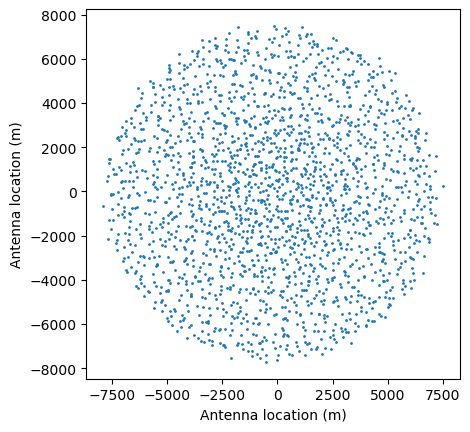

In [3]:
fig, ax = plt.subplots()
ax.scatter(antpos[:,0], antpos[:,1], s=1)
ax.set_aspect(1)
ax.set_xlabel("Antenna location (m)")
ax.set_ylabel("Antenna location (m)")
plt.show()

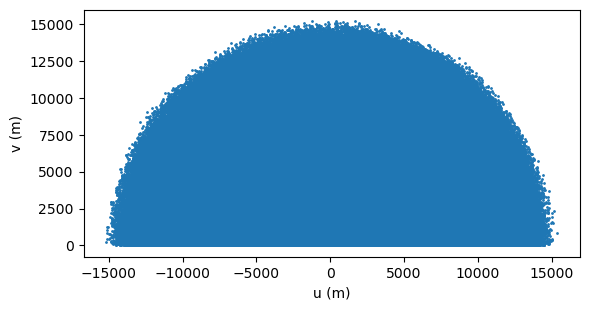

In [4]:
baselines_m = dsa2000_sensitivity.get_baselines(antpos)
fig, ax = plt.subplots()
ax.scatter(baselines_m[:,0], baselines_m[:,1], s=1)
ax.set_aspect(1)
ax.set_xlabel("u (m)")
ax.set_ylabel("v (m)")
plt.show()

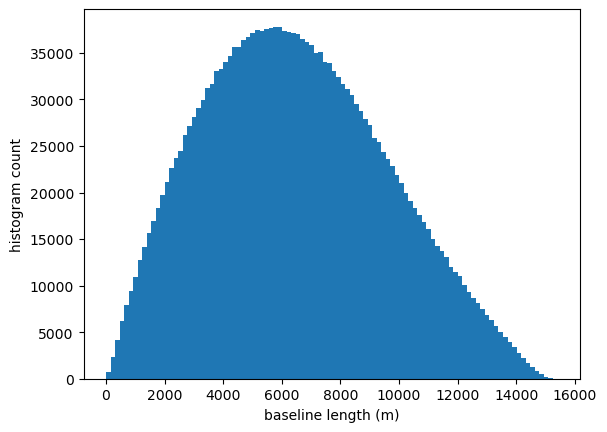

In [5]:
plt.hist(np.sqrt(np.sum(baselines_m**2., axis=1)), bins=100)
plt.xlabel("baseline length (m)")
plt.ylabel("histogram count")
plt.show()

In [ ]:
nsamples, bin_centers, binned_ps_variance, nsamples_2d, bin_centers_kperp, bin_centers_kpar, binned_ps_variance_2d = dsa2000_sensitivity.delay_ps_sensitivity_analysis()

kx: [-1.29414018 -0.17447235  0.2217524  ...  2.41459056  1.51072421
 -0.90386635]
ky: [-1.29414018 -0.17447235  0.2217524  ...  2.41459056  1.51072421
 -0.90386635]
kz: [-6.00861563 -6.0059356  -6.00325558 ...  6.00057555  6.00325558
  6.0059356 ]
bin_centers_kperp: [0.05025396 0.15076187 0.25126978 0.35177769 0.4522856  0.55279351
 0.65330142 0.75380933 0.85431724 0.95482515 1.05533306 1.15584097
 1.25634888 1.3568568  1.45736471 1.55787262 1.65838053 1.75888844
 1.85939635 1.95990426 2.06041217 2.16092008 2.26142799 2.3619359
 2.46244381 2.56295173 2.66345964 2.76396755 2.86447546 2.96498337
 3.06549128 3.16599919 3.2665071  3.36701501 3.46752292 3.56803083
 3.66853874 3.76904665 3.86955457 3.97006248 4.07057039 4.1710783
 4.27158621 4.37209412 4.47260203 4.57310994 4.67361785 4.77412576
 4.87463367 4.97514158]
nsamples_kperp: [836 864 865 842 865 853 850 862 894 873 854 867 897 824 871 826 872 894
 891 881 854 831 734 782 796 776 804 794 769 739 740 704 693 666 666 664
 572 590 607

/Users/ruby/Astro/rlb_LWA/dsa2000_sensitivity.py:629: RuntimeWarning: divide by zero encountered in true_divide
  nsamples_2d,


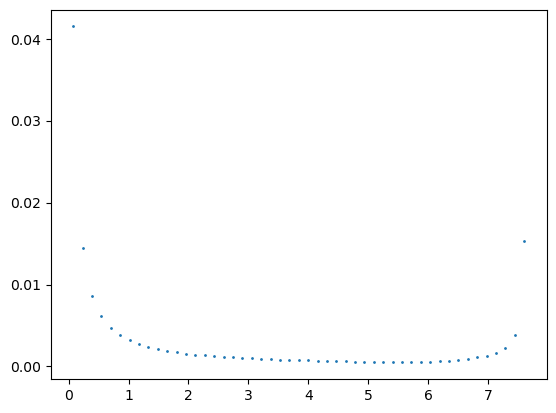

In [7]:
plt.scatter(bin_centers, np.sqrt(binned_ps_variance), s=1)

In [21]:
print(nsamples_2d[0:10, 20])
print(nsamples_2d[-10:, 20])

[37620 38880 38925 37890 38925 38385 38250 38790 40230 39285]
[24345 23355 21105 19800 18855 18450 15300 12780 10845  5625]


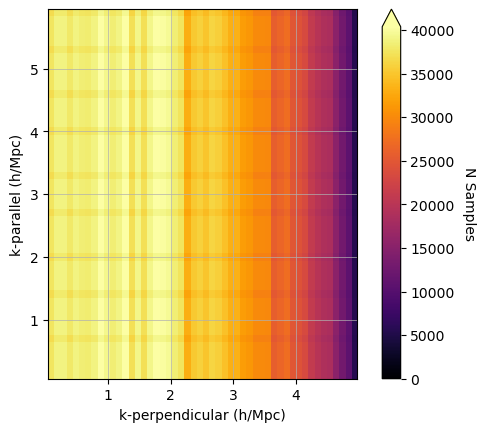

In [8]:
fig, ax = plt.subplots()
use_cmap = cm.get_cmap("inferno").copy()
cax = ax.imshow(
    nsamples_2d.T,
    origin="lower",
    interpolation="none",
    extent=[np.min(bin_centers_kperp), np.max(bin_centers_kperp), np.min(bin_centers_kpar), np.max(bin_centers_kpar)],
    vmin=0,
    cmap=use_cmap,
)
ax.set_xlabel("k-perpendicular (h/Mpc)")
ax.set_ylabel("k-parallel (h/Mpc)")
ax.grid(linewidth=.5)
cbar = fig.colorbar(cax, extend="max")
cbar.set_label("N Samples", rotation=270, labelpad=15)
plt.show()

In [9]:
window = scipy.signal.blackmanharris(100)

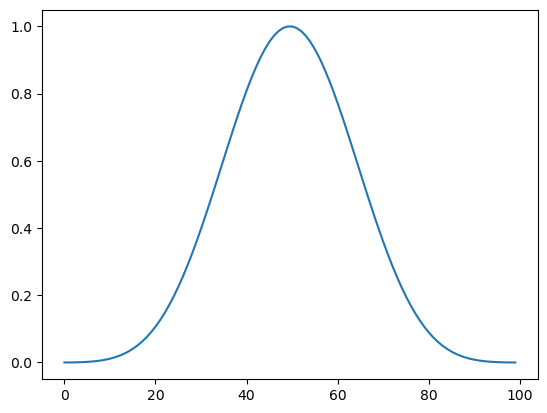

In [10]:
plt.plot(window)

In [13]:
dsa2000_sensitivity.get_kpar_conversion_factor(1000000)

41133.10326990826